In [1]:
from gcsa.event import Event
from gcsa.google_calendar import GoogleCalendar
from gcsa.recurrence import Recurrence, DAILY, SU, SA

import plotly.express as px
import plotly.graph_objects as go

import pandas as pd

from datetime import datetime, timedelta, date
import dateutil
from dateutil.parser import parse
import calendar
import numpy as np
from circle_cal.model import CalendarElement
import circle_cal as cc
import circle_cal.model as model
import pathlib
from rich import print
import pytz
from pytz import timezone

In [2]:
cred = pathlib.Path('/Users/kdavis10/.config/.credentials')
cred_json = "pygooglecal.apps.googleusercontent.com.json"

try:
    gcal = GoogleCalendar('keithwdavis@gmail.com',
                          credentials_path=cred / cred_json)
except Exception as e:
    (cred / "token.pickle").unlink()

In [3]:
y24 = CalendarElement(year=2024)
len(list(y24.recursive_iteration("day")))

366

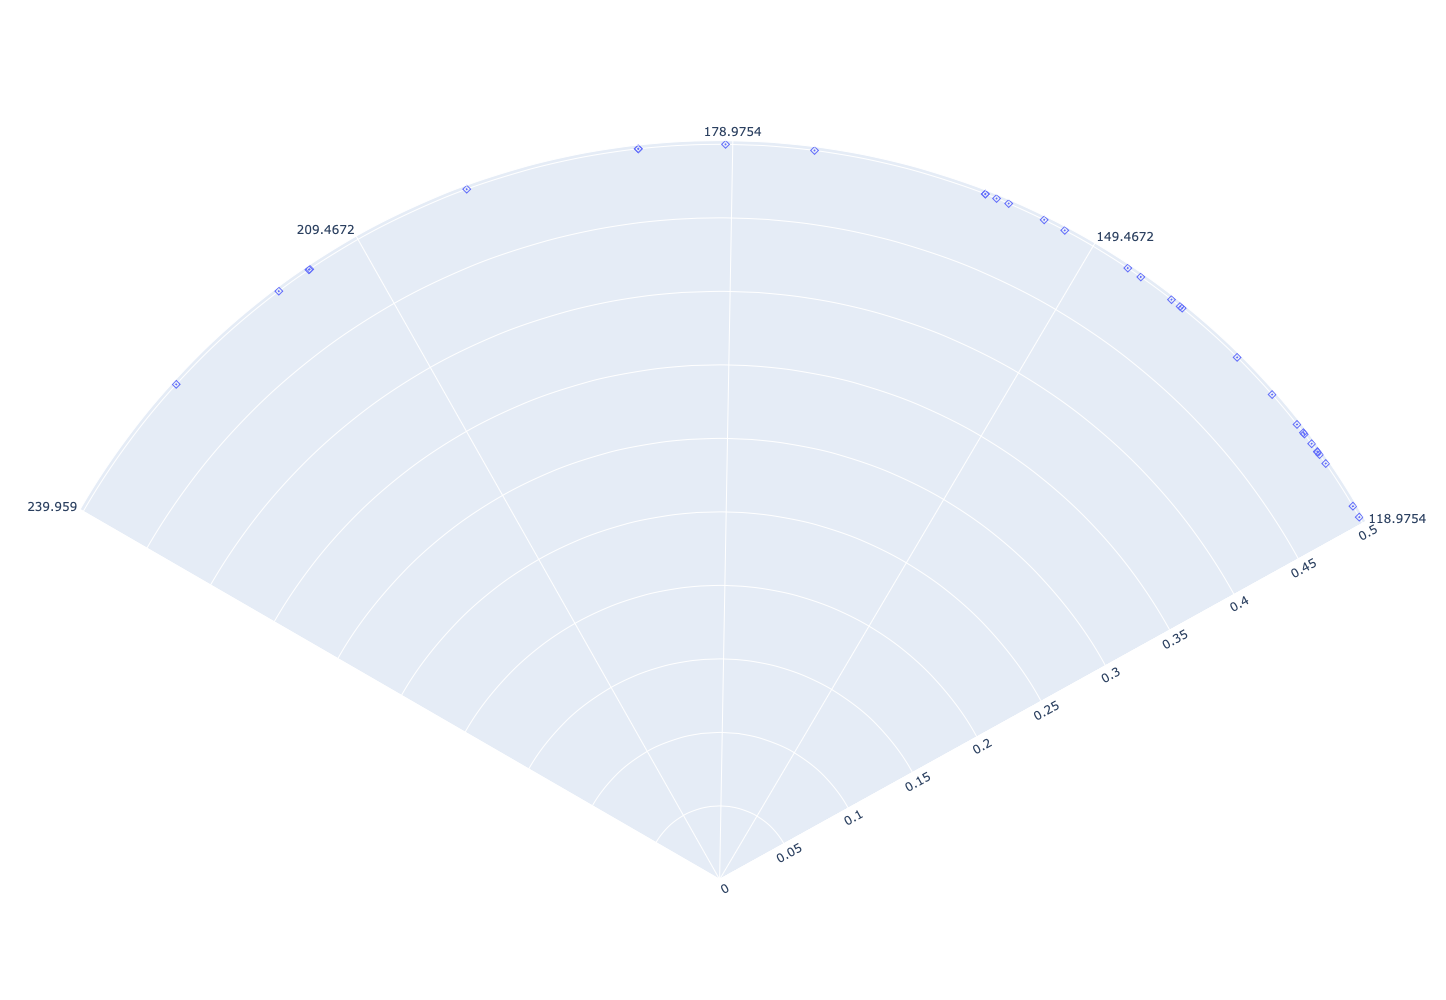

2024-06-10 12:00:00

In [27]:
year = y24 = CalendarElement(year=2024)

eve = gcal.get_events(y24.start.datetime(), y24.stop.datetime(), single_events=True)
eve = [model.EventWrap(ev) for ev in eve if (ev.end - ev.start) / timedelta(days=1) <=1]

def make_point_trace(events, d_to_th):
    
    r = []
    theta = []
    text = []
    for eve in events:
        r.append(.5)
        theta.append(model.to_theta(eve.mid)),
        #theta.append(eve.mid)
        text.append(" ".join((str(eve.mid), eve.summary)))
        
    t = go.Scatterpolar(r=r, theta=theta, mode="markers",
                        hovertext=text,
                        marker_symbol="diamond-open-dot",
                        )
    return t

t = make_point_trace(eve, 366 / 360)
rot = -90
fig = go.Figure(data=t)
sector = [cc.model.to_theta(y24[4].start.datetime())+rot,
          cc.model.to_theta(y24[7].stop.datetime())+rot]
fig.update_layout(height=1000)

fig.update_layout(dict(polar=
                       dict(angularaxis=
                            dict(direction="counterclockwise",
                                 
                                 rotation=rot,
                                 #showticklabels=False,
                                 tickmode="array", tickvals=[cc.model.to_theta(m.stop.datetime()) for m in y24],
                                 ),
                            sector=sector,
                            
                           ),
 
                      ),
                 ),


fig.show()

print(eve[0].mid)

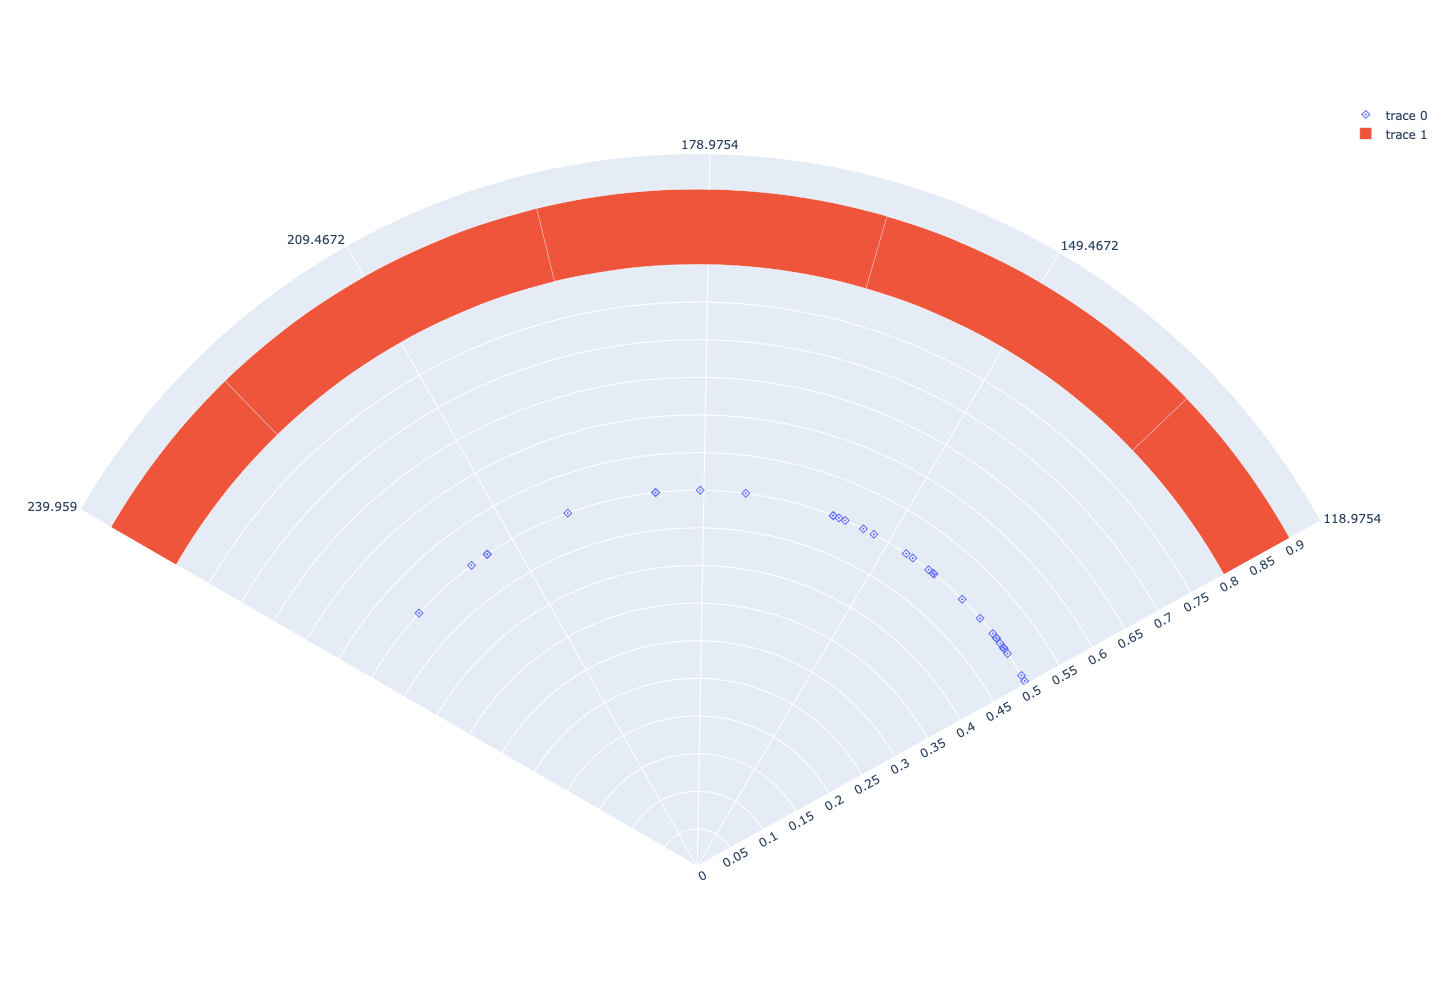

In [28]:
fig.add_trace(go.Barpolar(base = [.8] * len(year[3:8]),r=[.1] * len(year[3:8]),
                          theta=[model.to_theta(m.mid) for m in year[3:8]],
                          width=[len(m) * 366 / 360 for m in year[3:8]]))
fig.show()

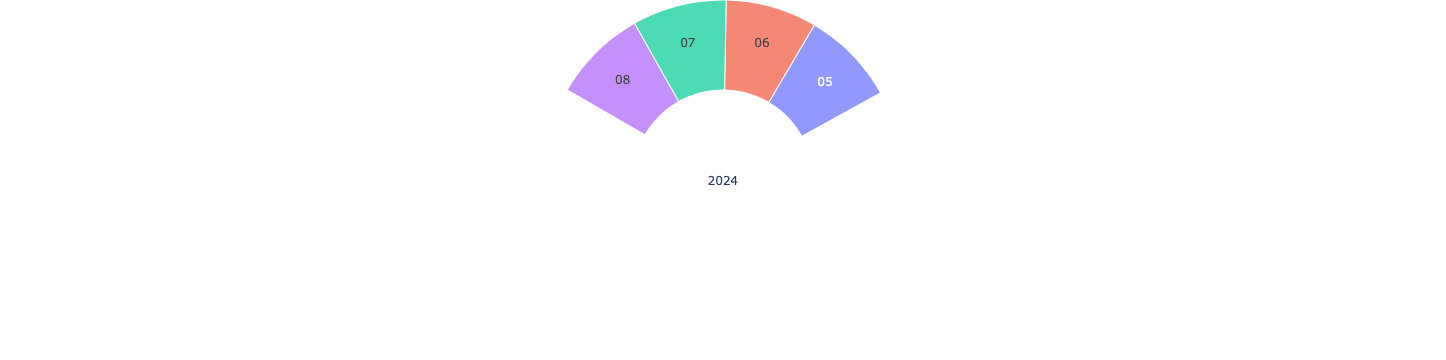

In [18]:
yeard = dict(labels=[str(year.year)] + [str(m.month) for m in year[4:8]],
             parents=[""] + [str(year.year)] * len(year[4:8]),
             values=[366] + [len(m) for m in year[4:8]]
            )
sbfig =go.Figure(go.Sunburst(
    labels=yeard["labels"],
    parents=yeard["parents"],
    values=yeard["values"],
    sort=False,
    rotation=model.to_theta(year[4][0].datetime())-90,
    branchvalues="total",
))
# Update layout for tight margin
# See https://plotly.com/python/creating-and-updating-figures/
sbfig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

sbfig.show()

[{'year': 2024, 'month': 5, 'type': 'CalendarElement'},
 {'year': 2024, 'month': 6, 'type': 'CalendarElement'},
 {'year': 2024, 'month': 7, 'type': 'CalendarElement'},
 {'year': 2024, 'month': 8, 'type': 'CalendarElement'}]